In [41]:
import glob, os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score,ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from skimage import io
import cv2

In [4]:
predict = np.load('./result/npy/resnet152_pred.npy')
true = np.load('./result/npy/resnet152_true.npy')

print(predict.shape)
print(true.shape)
print(predict[0], true[0])
print(predict.dtype)

(47, 2)
(47,)
[0.9471329  0.05286709] 0
float32


In [30]:
print('%.2f' % predict[i][1])
print(float('%.2f' % predict[i][1]))

0.03
0.03


In [17]:
# results = np.ndarray((len(predict)), dtype=np.int8)
results = []
label = []
for i in range(len(predict)):
    label.append(np.int8(true[i]))
    if predict[i][0]> predict[i][1]:
        results.append(0)
#         results[i]=0
    else:
#         results[i]=1
        results.append(1)

In [34]:
results = []
label = []
for i in range(len(predict)):
    label.append(np.int8(true[i]))
    results.append(float('%.3f' % predict[i][1]))

In [6]:
for a in range(len(predict)):
    print(predict[a], true[a], results[a])

[0.9471329  0.05286709] 0 0
[0.9762053  0.02379477] 0 0
[0.9770567  0.02294333] 0 0
[0.98780465 0.0121954 ] 0 0
[0.84567434 0.15432562] 0 0
[1.0000000e+00 2.9153668e-08] 0 0
[0.827688   0.17231205] 0 0
[0.9959947  0.00400529] 0 0
[0.99428916 0.00571077] 0 0
[0.81303114 0.18696888] 0 0
[0.9781874  0.02181265] 0 0
[0.97944355 0.02055641] 0 0
[9.9999297e-01 7.0660976e-06] 0 0
[9.999958e-01 4.138014e-06] 0 0
[1.0000000e+00 8.4307095e-09] 0 0
[9.999994e-01 6.053126e-07] 0 0
[9.999939e-01 6.101188e-06] 0 0
[0.99846244 0.00153754] 0 0
[0.90194726 0.09805272] 0 0
[0.86123717 0.1387629 ] 0 0
[0.995743   0.00425702] 0 0
[0.47217557 0.5278244 ] 0 1
[0.7612368  0.23876327] 0 0
[0.82763416 0.17236584] 0 0
[0.80437964 0.19562039] 0 0
[0.3121553 0.6878447] 0 1
[0.95140165 0.0485984 ] 0 0
[0.82410055 0.17589952] 0 0
[0.9327627  0.06723735] 0 0
[0.98516303 0.01483694] 0 0
[0.99684536 0.00315467] 0 0
[0.98679256 0.01320745] 0 0
[0.43196335 0.5680367 ] 0 1
[0.9174291  0.08257093] 0 0
[0.70933974 0.290660

In [8]:
help(precision_recall_curve)

Help on function precision_recall_curve in module sklearn.metrics._ranking:

precision_recall_curve(y_true, probas_pred, *, pos_label=None, sample_weight=None)
    Compute precision-recall pairs for different probability thresholds
    
    Note: this implementation is restricted to the binary classification task.
    
    The precision is the ratio ``tp / (tp + fp)`` where ``tp`` is the number of
    true positives and ``fp`` the number of false positives. The precision is
    intuitively the ability of the classifier not to label as positive a sample
    that is negative.
    
    The recall is the ratio ``tp / (tp + fn)`` where ``tp`` is the number of
    true positives and ``fn`` the number of false negatives. The recall is
    intuitively the ability of the classifier to find all the positive samples.
    
    The last precision and recall values are 1. and 0. respectively and do not
    have a corresponding threshold.  This ensures that the graph starts on the
    y axis.
    
  

In [36]:
print(np.array(results))
print(results)
print(label)

[0.053 0.024 0.023 0.012 0.154 0.    0.172 0.004 0.006 0.187 0.022 0.021
 0.    0.    0.    0.    0.    0.002 0.098 0.139 0.004 0.528 0.239 0.172
 0.196 0.688 0.049 0.176 0.067 0.015 0.003 0.013 0.568 0.083 0.291 0.438
 0.02  0.    0.001 0.001 0.341 0.464 0.    0.352 0.    0.006 0.025]
[0.053, 0.024, 0.023, 0.012, 0.154, 0.0, 0.172, 0.004, 0.006, 0.187, 0.022, 0.021, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002, 0.098, 0.139, 0.004, 0.528, 0.239, 0.172, 0.196, 0.688, 0.049, 0.176, 0.067, 0.015, 0.003, 0.013, 0.568, 0.083, 0.291, 0.438, 0.02, 0.0, 0.001, 0.001, 0.341, 0.464, 0.0, 0.352, 0.0, 0.006, 0.025]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [46]:
nP = 0
for p in range(len(label)):
    if label[p] == 1:
        nP+=1
print(nP)

11


0


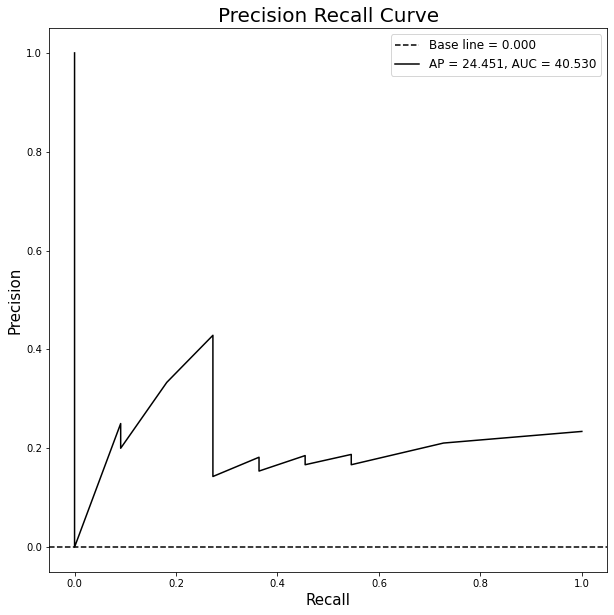

In [57]:
precision_1, recall_1, thresholds_1 = precision_recall_curve(np.array(label), np.array(results))
average_precision_score_1 = average_precision_score(np.array(label), np.array(results))*100

# fpr , tpr , thresholds = roc_curve (np.array(label), np.array(results))
roc_auc_score_1 = roc_auc_score(np.array(label), np.array(results))*100

base_line = round(nP/(nP+len(label)))
print(base_line)
fig = plt.figure(figsize=(10,10))        
plt.title('Precision Recall Curve',fontsize=20)
plt.xlabel('Recall',fontsize=15)
plt.ylabel('Precision',fontsize=15)
plt.axhline(base_line, color='black', linestyle='--', label= 'Base line = %0.3f'% (base_line))
plt.plot(recall_1, precision_1, color='black', label= 'AP = %0.3f, AUC = %0.3f'% (average_precision_score_1, roc_auc_score_1))
plt.legend(loc="upper right",fontsize=12)
plt.savefig('./result/figure/PRcurve_0510_1.jpg', dpi=300)

0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
0 0
0 0
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
33 3 11 0


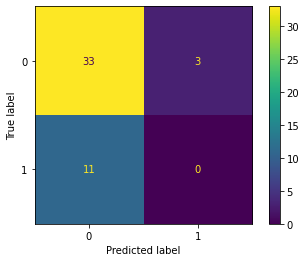

In [43]:
binary_result=[]
for tr in range(len(results)):
    if results[tr]>0.5:
        binary_result.append(1)
    else:
        binary_result.append(0)
for k in range(len(results)):
    print(binary_result[k], label[k])
tn, fp, fn, tp = confusion_matrix(label, binary_result).ravel()
print(tn, fp, fn, tp)
cm = confusion_matrix(label, binary_result)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()